In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=2.457042946964126 et b_1=6.246954853477103


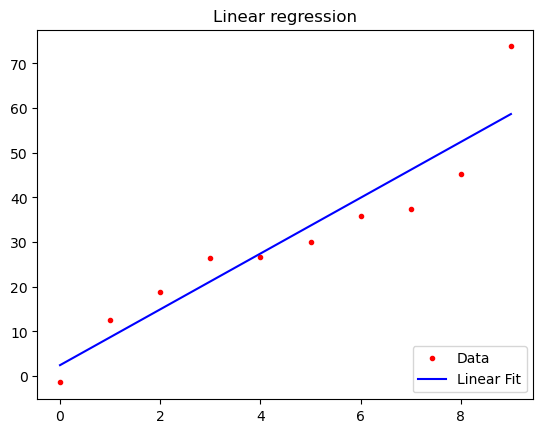

In [7]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def calc_s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



In [10]:
listx = np.linspace(1,10,10)
list_b0 = []
list_b1 = []
list_s2 = []
for i in range(10) :
    if i <=4 :
        x, y = generate_data(n_samples=10, outlier=True)
    else :
        x, y = generate_data(n_samples=10, outlier=False)
    # instanciation de sklearn.linear_model.LinearRegression
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
    list_b0.append(lr.intercept_)
    list_b1.append(lr.coef_)
    print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))
    s2 = calc_s2(y, lr.predict(x[:, np.newaxis]))
    list_s2.append(s2)
    print(f's2={s2}')


b_0=9.149401132448553 et b_1=4.602524370507366
s2=28.203325568923297
b_0=7.747917025993026 et b_1=5.068701412791648
s2=39.019684632052716
b_0=9.979060520114832 et b_1=4.514428854260841
s2=26.454754113643205
b_0=6.759731139607283 et b_1=5.050771650438241
s2=32.65907567529684
b_0=6.903038793797535 et b_1=5.210401902428649
s2=30.34187422014719
b_0=11.523959440728788 et b_1=3.694807487551076
s2=9.196839238292704
b_0=9.14578814165964 et b_1=4.397721507423065
s2=7.289958870772525
b_0=10.770209662623056 et b_1=3.8295825916180184
s2=3.8837769098472705
b_0=9.892818817414568 et b_1=3.7624074856264134
s2=5.497698562380045
b_0=7.582790704941246 et b_1=4.599453587855375
s2=8.878139549839874


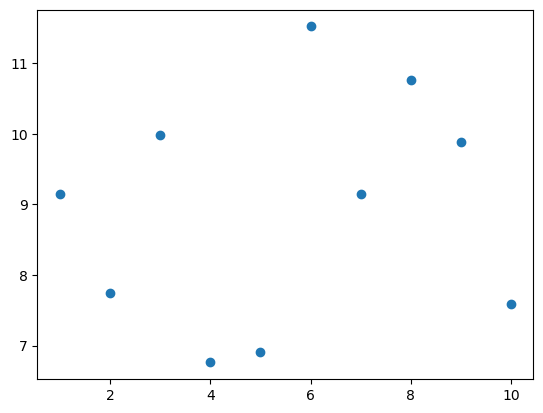

In [17]:
plt.scatter(listx,list_b0)

La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  \hat{y_{(i)j}} est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [20]:
x, y = generate_data(n_samples=10, outlier=True)

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [30]:
def profil_residuel(x, y, i):
    x_del_i=np.delete(x,i)
    y_del_i=np.delete(y,i)
    lr = LinearRegression()
    lr.fit(x_del_i[:, np.newaxis], y_del_i)
    y_hat = lr.predict(x_del_i[:, np.newaxis])
    errors = [y_del_i[j] - y_hat[j] for j in range(len(y_del_i))]
    return errors

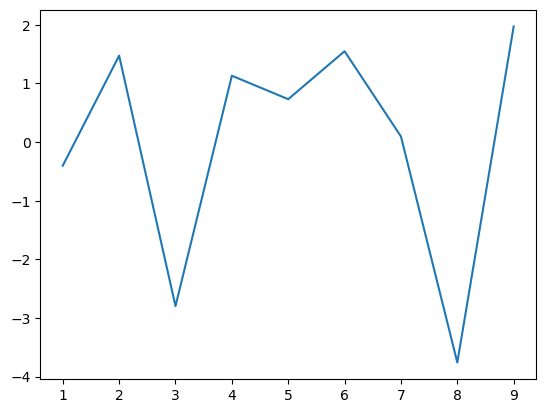

In [31]:
listx = np.delete(np.linspace(1,10,10),9)
plt.plot(listx, profil_residuel(x,y,9))

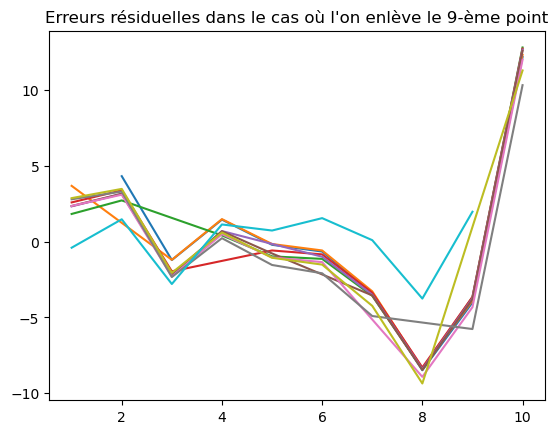

In [32]:
for i in range (10) :
    listx = np.delete(np.linspace(1,10,10),i)
    plt.plot(listx, profil_residuel(x,y,i))
    plt.title(f"Erreurs résiduelles dans le cas où l'on enlève le {i}-ème point")

In [ ]:
def distance_cook(x, y_true, y_pred) :
    somme = 0
    for i in range (len(x)) :
        somme += profil_residuel(x, y_true, i)**2
    somme = somme/ (2*s2(y_true, y_pred)**2)

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [41]:
def cook(x, y, i):
    lr_global = LinearRegression()
    lr_global.fit(x[:, np.newaxis], y)
    y_hat = lr_global.predict(x[:, np.newaxis])

    x_del_i=np.delete(x,i)
    y_del_i=np.delete(y,i)
    lr_i = LinearRegression()
    lr_i.fit(x_del_i[:, np.newaxis], y_del_i)
    y_hat_i = lr_i.predict(x_del_i[:, np.newaxis])
    

    cook = np.sum((y_hat_i - np.delete(y_hat,i))**2)/(2*calc_s2(y,y_hat)**2)
    
    return cook

In [43]:
cookito = []
for j in range(10) :
    cookito.append(cook(x,y,j))
print(cookito)

[np.float64(0.001607380555679428), np.float64(0.0017994739181523608), np.float64(0.0004827283017527537), np.float64(4.585970959240312e-05), np.float64(2.761956489151495e-05), np.float64(5.070936293754528e-05), np.float64(0.0008923462828477312), np.float64(0.007704830171288146), np.float64(0.0023205445510881472), np.float64(0.0442304309946464)]


#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [ ]:
...

## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...